Normalizing flow regression with the Rosenbrock-Gaussian (D=6) example.

In [1]:
from omegaconf import OmegaConf

from benchflow.plotting.utils import corner_plot
from benchflow.utilities.cfg import cfg_to_task
from nfr import NFR

In [2]:
task_name = "multi_banana"
task_cfg = OmegaConf.load(
    f"./benchflow/benchflow/config/task/{task_name}.yaml"
)
task = cfg_to_task(task_cfg)

True log marginal likelihood:  -6.822309022102013


In [3]:
from benchflow.algorithms.generate_initial_set import (
    GenerateInitialSet,
)

algo_cfg = OmegaConf.load(
    "./benchflow/benchflow/config/algorithm/generate_initial_set.yaml"
)
N_likelihood_evals = 3000  # Only use this many evaluations for the likelihood (not the 3000D in the paper experiments)
algo_cfg["method"] = "CMA-ES"
algo_cfg.map_optimization.N_fun_evals = N_likelihood_evals
algo_cfg["data_save_path"] = (
    f"./data/initial_points/{task_cfg.name}/initial_train_set_{N_likelihood_evals}.pkl"
)

cfg = OmegaConf.create({"task": task_cfg, "algorithm": algo_cfg})
data = GenerateInitialSet(cfg).run()

print(data["X"].shape)
print(f"Total number of MAP runs: {data['num_MAP_runs']}")

True log marginal likelihood:  -6.822309022102013
Find MAP in the original constrained space
Generating initial set...
Prior samples are used.
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=nan, Sun Apr 13 13:52:39 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 1.426149593320516e+01 1.0e+00 2.47e-01  2e-01  3e-01 0:00.0
    2     18 1.434675045381182e+01 1.3e+00 2.25e-01  2e-01  2e-01 0:00.0
    3     27 1.559463473468531e+01 1.4e+00 1.92e-01  2e-01  2e-01 0:00.0
   49    441 1.212764327627192e+01 4.3e+00 1.70e-02  6e-03  1e-02 0:00.1
termination on tolx=0.01 (Sun Apr 13 13:52:40 2025)
final/bestever f-value = 1.212774e+01 1.212675e+01 after 442/416 evaluations
incumbent solution: [np.float64(0.04625934339873371), np.float64(0.010294733221732109), np.float64(0.03374419536475864), np.float64(0.005687640038929423), np.float64(-0.006185349222884228), np.float64(0.012188430870986401)]
std deviation: [np.float64(0.008999501730773426), np.

In [4]:
options = {
    "log_likes": data["log_likes"],
    "log_priors_orig": data["log_priors"],
    "S_orig": data.get("S", None),
}
if task_cfg.get("noisy"):
    options["specify_target_noise"] = True

options.update(
    {
        "experiment_folder": f"./logs/{task_cfg.name}/",
        "num_warmup": 5,
        "nfr_iter": 5,
    }
)

nfr = NFR(
    x0=data["X"],  # initial point
    lower_bounds=task.lb,  # lower bounds
    upper_bounds=task.ub,  # upper bounds
    plausible_lower_bounds=task.plb,  # plausible LB
    plausible_upper_bounds=task.pub,  # plausible UB
    options=options,
)
nfr.optimize();

2025-04-13 13:52:43 Removing 0/3000 points that are inf in transformed space (too close to the bounds): []


Outputs will be written to folder: ./logs/multi_banana_D_6_N_2/


100%|██████████| 3000/3000 [00:00<00:00, 9569.62it/s] 
2025-04-13 13:52:44 x0 range (transformed): min=[-1.93489924 -0.9844165  -1.3763719  -1.12129726 -1.71435793 -0.96225164], max=[1.2179237  1.33936202 1.06072787 1.59446316 0.99538765 1.1527379 ]
2025-04-13 13:52:44 x0 range (original): [-11.60939542  -5.90649901  -8.2582314   -6.72778357 -10.28614756
  -5.77350983], [7.30754217 8.03617211 6.36436722 9.56677895 5.9723259  6.91642742]
2025-04-13 13:52:44 Beginning optimization assuming EXACT observations of the log-likelihood.


Update log joint values according to target temperature 0.0.
{'beta': np.float64(0.0)}


2025-04-13 13:52:49 total loss: 518.9, loss_reg: 0.0, lnZ: 0.00


{'fit_loss_num_calls': 0, 'loss': 518.8759004441413, 'loss_reg': 0.005319353506682874, 'lnZ': 0.0}


2025-04-13 13:52:50 total loss: 0.0, loss_reg: 0.0, lnZ: 0.00
2025-04-13 13:52:53 Optimized lnZ to -2.677025297081571.
2025-04-13 13:52:53 total loss: 2027699767.4, loss_reg: 0.0, lnZ: -2.68


Update log joint values according to target temperature 0.25.
{'beta': np.float64(0.25)}
{'fit_loss_num_calls': 0, 'loss': 2027699767.4231708, 'loss_reg': 0.005317534198203222, 'lnZ': -2.677025297081571}
{'fit_loss_num_calls': 100, 'loss': 132272116.1234457, 'loss_reg': 220.7702469472869, 'lnZ': -1.8742349883094023}
{'fit_loss_num_calls': 200, 'loss': 6966803.107216766, 'loss_reg': 479.2109437319424, 'lnZ': -2.013769424637462}
{'fit_loss_num_calls': 300, 'loss': 2186441.4080950543, 'loss_reg': 540.5212028414247, 'lnZ': -2.016882304331874}
{'fit_loss_num_calls': 400, 'loss': 1249854.756562366, 'loss_reg': 597.6265274668716, 'lnZ': -2.0163927411723224}
{'fit_loss_num_calls': 500, 'loss': 898141.7829209388, 'loss_reg': 662.8697764631041, 'lnZ': -2.0228697787932113}


2025-04-13 13:53:25 total loss: 888526.6, loss_reg: 665.0, lnZ: -2.02
2025-04-13 13:53:28 Optimized lnZ to -4.429703571943188.
2025-04-13 13:53:28 total loss: 924682169.4, loss_reg: 665.0, lnZ: -4.43


Update log joint values according to target temperature 0.5.
{'beta': np.float64(0.5)}
{'fit_loss_num_calls': 0, 'loss': 924682169.3969728, 'loss_reg': 664.9870694204695, 'lnZ': -4.429703571943188}
{'fit_loss_num_calls': 100, 'loss': 2785306.675968437, 'loss_reg': 737.983321819077, 'lnZ': -3.841234512516229}
{'fit_loss_num_calls': 200, 'loss': 1795053.874726439, 'loss_reg': 787.2943790411076, 'lnZ': -3.841627496011124}
{'fit_loss_num_calls': 300, 'loss': 1265880.9280057936, 'loss_reg': 848.0126967142502, 'lnZ': -3.8455190992529893}
{'fit_loss_num_calls': 400, 'loss': 965724.235291429, 'loss_reg': 885.0230934287804, 'lnZ': -3.8511229254789807}
{'fit_loss_num_calls': 500, 'loss': 797716.0663477094, 'loss_reg': 912.0375558528872, 'lnZ': -3.851935958670517}


2025-04-13 13:53:59 total loss: 784590.0, loss_reg: 914.2, lnZ: -3.85
2025-04-13 13:54:02 Optimized lnZ to -6.0518326902852415.
2025-04-13 13:54:02 total loss: 429276699.6, loss_reg: 914.2, lnZ: -6.05


Update log joint values according to target temperature 0.75.
{'beta': np.float64(0.75)}
{'fit_loss_num_calls': 0, 'loss': 429276699.5960117, 'loss_reg': 914.1937239321546, 'lnZ': -6.0518326902852415}
{'fit_loss_num_calls': 100, 'loss': 1676044.3868322463, 'loss_reg': 983.7688990953808, 'lnZ': -5.524653654071281}
{'fit_loss_num_calls': 200, 'loss': 1051773.5199821987, 'loss_reg': 1027.4014571631592, 'lnZ': -5.51355588795923}
{'fit_loss_num_calls': 300, 'loss': 827390.6546968957, 'loss_reg': 1055.0063505874368, 'lnZ': -5.506329598288671}
{'fit_loss_num_calls': 400, 'loss': 655829.0388489736, 'loss_reg': 1085.3222322234462, 'lnZ': -5.501129523332644}
{'fit_loss_num_calls': 500, 'loss': 551011.840992913, 'loss_reg': 1115.7387586882899, 'lnZ': -5.497097464015202}


2025-04-13 13:54:34 total loss: 539067.1, loss_reg: 1120.2, lnZ: -5.49
2025-04-13 13:54:37 Optimized lnZ to -7.611711480398587.
2025-04-13 13:54:37 total loss: 306761814.8, loss_reg: 1120.2, lnZ: -7.61


Update log joint values according to target temperature 1.0.
{'beta': np.float64(1.0)}
{'fit_loss_num_calls': 0, 'loss': 306761814.83629537, 'loss_reg': 1120.1600743249624, 'lnZ': -7.611711480398587}
{'fit_loss_num_calls': 100, 'loss': 1301543.83457778, 'loss_reg': 1195.3141668780327, 'lnZ': -6.892960130316413}
{'fit_loss_num_calls': 200, 'loss': 700309.1480013431, 'loss_reg': 1241.3363145004491, 'lnZ': -6.884549587159847}
{'fit_loss_num_calls': 300, 'loss': 518578.63507240213, 'loss_reg': 1264.4578401722827, 'lnZ': -6.8794463691681695}
{'fit_loss_num_calls': 400, 'loss': 419791.8325204552, 'loss_reg': 1284.9889625071803, 'lnZ': -6.868966719648336}
{'fit_loss_num_calls': 500, 'loss': 361418.70591437805, 'loss_reg': 1305.0850681394618, 'lnZ': -6.861908439392581}


2025-04-13 13:55:10 total loss: 352974.3, loss_reg: 1307.7, lnZ: -6.86


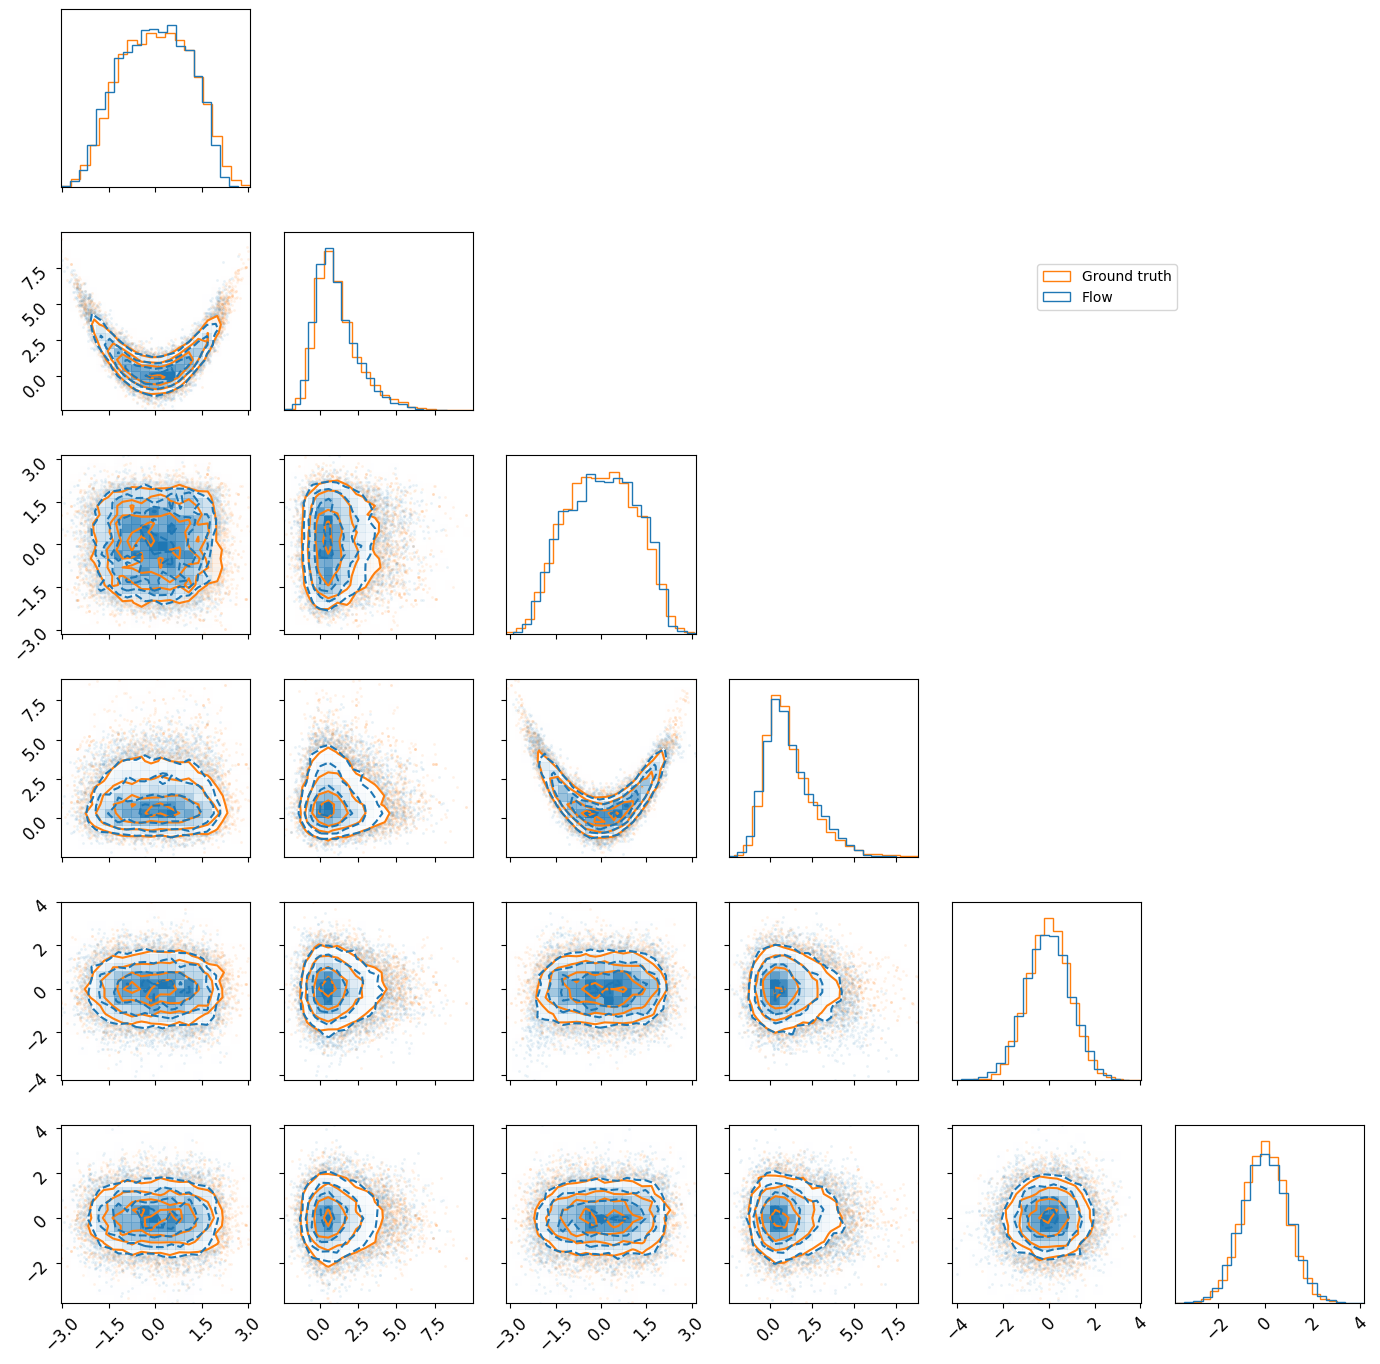

In [5]:
gt_samples = task.get_posterior_samples(10000)
flow_samples = nfr.surrogate.sample(10000)
flow_samples_orig = nfr.parameter_transformer.inverse(flow_samples)
fig = corner_plot(gt_samples, flow_samples_orig)